In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import json

# https://plotly.com/python/getting-started/#jupyterlab-support
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

pd.options.display.max_columns = None
# Use 'display(df)' instead of 'df' to display all columns.

In [39]:
# d = pd.read_csv("./../../our_data/Etap4/checkpoints/GB_US_title_clean.csv")
# d.columns.to_list()

### Wizualizacja PCA

In [2]:
mapping = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
     10: 'Music',
     15: 'Pets & Animals',
     17: 'Sports',
     18: 'Short Movies',
     19: 'Travel & Events',
     20: 'Gaming',
     21: 'Videoblogging',
     22: 'People & Blogs',
     23: 'Comedy',
     24: 'Entertainment',
     25: 'News & Politics',
     26: 'Howto & Style',
     27: 'Education',
     28: 'Science & Technology',
     29: 'Nonprofits & Activism',
     30: 'Movies',
     31: 'Anime/Animation',
     32: 'Action/Adventure',
     33: 'Classics',
     34: 'Comedy',
     35: 'Documentary',
     36: 'Drama',
     37: 'Family',
     38: 'Foreign',
     39: 'Horror',
     40: 'Sci-Fi/Fantasy',
     41: 'Thriller',
     42: 'Shorts',
     43: 'Shows',
     44: 'Trailers'
}

In [16]:
# chosen_columns = df.loc[:, 'channel_title':'TFIDF_objects_str_19'].columns

chosen_columns_r1 = [
    'TFIDF_clean_thumb_ocr_text_V2_26',
    'TFIDF_title_clean_26',
    'TFIDF_title_clean_25',
    'TFIDF_title_clean_23',
    'TFIDF_title_clean_1',
    'TFIDF_clean_thumb_ocr_text_V2_23',
    'likes/views',
    'TFIDF_title_clean_10',
    'TFIDF_title_clean_28',
 'channel_title',
 'TFIDF_title_clean_17',
 'n_of_tags',
 'title_punctuation_percent',
 'TFIDF_title_clean_15',
 'title_capital_letters_percent',
 'TFIDF_title_clean_29',
 'title_punctuation',
 'TFIDF_clean_thumb_ocr_text_V2_15',
 'title_small_letters_percent',
 'TFIDF_title_clean_27',
 'TFIDF_clean_thumb_ocr_text_V2_25',
    
 'desc_n_of_urls',
 'TFIDF_clean_thumb_ocr_text_V2_28',
 'desc_punctuation_percent',
 'desc_length',
 'desc_small_letters',
 'title_small_letters',
 'desc_n_of_words',
 'title_capital_letters',
 'pub_hour',
 'TFIDF_title_clean_24',
 'desc_capital_letters',
 'desc_punctuation',
 'desc_capital_letters_percent',
 'title_length',
 'avg_texts_coordY',
 'desc_small_letters_percent',
 'TFIDF_clean_thumb_ocr_text_V2_10',
 'comment_count/views',
 'title_n_of_words',
 'mean_r',
 'isFacebook',
 'times_in_trend',
 'isInstagram',
 'dislikes/likes',
 'avg_likes',
 'likes',
 'pub_day_of_the_week',
 'TFIDF_title_clean_2',
 'mean_v',
 'std_r',
 'mean_g',
 'isTwitter',
 'dislikes/views',
 'avg_views',
 'TFIDF_clean_thumb_ocr_text_V2_1',
 'avg_texts_coordX',
 'time_to_trend_in_days',
 'std_g',
 'entropy',
 'views',
 'avg_views_increase_per_hour',
 'std_v',
 'faces',
 'tren_day_of_the_week',
 'std_s',
 'tren_month',
 'TFIDF_categories_str_25',
 'pub_month',
 'mean_s',
 'comment_count',
 'avg_comms',
 'mean_b',
 'TFIDF_title_clean_22',
 'tren_day',
 'pub_day',
 'std_b',
 'increase_likes',
 'TFIDF_title_clean_20',
 'TFIDF_categories_str_20',
 'TFIDF_categories_str_26',
 'mean_h',
 'dislikes',
 'TFIDF_categories_str_2',
 'std_h',
 'avg_dislikes',
 'TFIDF_categories_str_17',
 'TFIDF_categories_str_1',
 'increase_views',
 'TFIDF_categories_str_28',
 'TFIDF_clean_thumb_ocr_text_V2_27',
 'TFIDF_categories_str_23',
 'increase_dislikes',
 'TFIDF_categories_str_29',
 'TFIDF_categories_str_22',
 'TFIDF_categories_str_10',
 'increase_comms',
 'TFIDF_categories_str_19',
 'TFIDF_objects_str_25',
 'TFIDF_categories_str_27',
 'TFIDF_categories_str_15',
 'TFIDF_categories_str_24',
 'TFIDF_objects_str_28',
 'TFIDF_objects_str_22',
 'TFIDF_clean_thumb_ocr_text_V2_2',
 'Happy',
 'TFIDF_objects_str_15',
 'TFIDF_objects_str_24',
 'TFIDF_objects_str_1',
 'TFIDF_objects_str_20',
 'TFIDF_objects_str_26',
 'people',
 'TFIDF_objects_str_23',
 'TFIDF_categories_str_43',
 'TFIDF_objects_str_43',
 'TFIDF_objects_str_2',
 'TFIDF_objects_str_19',
 'TFIDF_objects_str_10',
 'TFIDF_objects_str_29',
 'TFIDF_objects_str_17',
 'TFIDF_objects_str_27',
 'desc_n_of_emojis',
 'TFIDF_clean_thumb_ocr_text_V2_17',
 'ocr_sentiment_compound',
 'TFIDF_clean_thumb_ocr_text_V2_29',
 'Sad',
 'Neutral',
 'TFIDF_title_clean_19',
 'TFIDF_clean_thumb_ocr_text_V2_22',
 'Angry',
 'TFIDF_clean_thumb_ocr_text_V2_24',
 'Fear',
 'TFIDF_title_clean_43',
 'comments_disabled',
 'TFIDF_clean_thumb_ocr_text_V2_20',
 'Surprise',
 'title_n_of_emojis',
 'TFIDF_clean_thumb_ocr_text_V2_19',
 'ratings_disabled',
 'video_error_or_removed',
 'TFIDF_clean_thumb_ocr_text_V2_43'
]

chosen_columns_r2 = [
    'video_error_or_removed',
 'ratings_disabled',
 'TFIDF_categories_str_26',
 'TFIDF_categories_str_10',
 'TFIDF_categories_str_28',
 'TFIDF_categories_str_23',
 'TFIDF_title_clean_10',
 'faces',
 'TFIDF_categories_str_2',
 'TFIDF_objects_str_10',
 'TFIDF_title_clean_23',
 'TFIDF_clean_thumb_ocr_text_V2_26',
 'TFIDF_clean_thumb_ocr_text_V2_10',
 'TFIDF_objects_str_1',
 'std_h',
 'TFIDF_title_clean_26',
 'channel_title',
 'entropy',
 'TFIDF_objects_str_24',
 'comments_disabled',
    
 'mean_h',
 'TFIDF_clean_thumb_ocr_text_V2_23',
 'TFIDF_categories_str_1',
 'std_g',
 'desc_small_letters',
 'TFIDF_categories_str_19',
 'Neutral',
 'Sad',
 'Happy',
 'mean_v',
 'Angry',
 'TFIDF_categories_str_29',
 'likes/views',
 'std_v',
 'isTwitter',
 'TFIDF_objects_str_22',
 'likes',
 'desc_n_of_words',
 'TFIDF_title_clean_25',
 'std_b',
 'TFIDF_categories_str_22',
 'TFIDF_objects_str_43',
 'avg_views_increase_per_hour',
 'TFIDF_title_clean_22',
 'title_capital_letters_percent',
 'Fear',
 'TFIDF_title_clean_29',
 'TFIDF_categories_str_25',
 'isFacebook',
 'TFIDF_objects_str_17',
 'avg_likes',
 'avg_views',
 'TFIDF_clean_thumb_ocr_text_V2_2',
 'TFIDF_title_clean_1',
 'desc_punctuation',
 'pub_month',
 'TFIDF_clean_thumb_ocr_text_V2_25',
 'TFIDF_title_clean_24',
 'TFIDF_categories_str_24',
 'time_to_trend_in_days',
 'times_in_trend',
 'TFIDF_objects_str_2',
 'n_of_tags',
 'Surprise',
 'TFIDF_title_clean_19',
 'TFIDF_objects_str_23',
 'TFIDF_objects_str_28',
 'avg_dislikes',
 'TFIDF_title_clean_28',
 'title_punctuation',
 'std_s',
 'TFIDF_clean_thumb_ocr_text_V2_1',
 'TFIDF_clean_thumb_ocr_text_V2_19',
 'comment_count/views',
 'TFIDF_clean_thumb_ocr_text_V2_28',
 'desc_capital_letters',
 'TFIDF_clean_thumb_ocr_text_V2_29',
 'increase_views',
 'increase_dislikes',
 'avg_texts_coordY',
 'TFIDF_clean_thumb_ocr_text_V2_15',
 'dislikes',
 'title_punctuation_percent',
 'tren_month',
 'TFIDF_objects_str_15',
 'TFIDF_clean_thumb_ocr_text_V2_24',
 'TFIDF_clean_thumb_ocr_text_V2_22',
 'title_small_letters_percent',
 'TFIDF_title_clean_17',
 'desc_punctuation_percent',
 'TFIDF_categories_str_15',
 'increase_likes',
 'TFIDF_clean_thumb_ocr_text_V2_27',
 'std_r',
 'TFIDF_clean_thumb_ocr_text_V2_17',
 'tren_day',
 'pub_hour',
 'TFIDF_clean_thumb_ocr_text_V2_20',
 'comment_count',
 'TFIDF_objects_str_20',
 'title_small_letters',
 'dislikes/views',
 'views',
 'desc_n_of_urls',
 'dislikes/likes',
 'TFIDF_title_clean_43',
 'TFIDF_title_clean_2',
 'TFIDF_title_clean_20',
 'isInstagram',
 'TFIDF_title_clean_27',
 'TFIDF_title_clean_15',
 'title_capital_letters',
 'desc_capital_letters_percent',
 'mean_g',
 'title_n_of_emojis',
 'TFIDF_clean_thumb_ocr_text_V2_43',
 'TFIDF_objects_str_26',
 'title_n_of_words',
 'TFIDF_categories_str_27',
 'mean_r',
 'TFIDF_categories_str_20',
 'desc_n_of_emojis',
 'pub_day_of_the_week',
 'desc_small_letters_percent',
 'avg_texts_coordX',
 'pub_day',
 'increase_comms',
 'tren_day_of_the_week',
 'TFIDF_categories_str_43',
 'people',
 'ocr_sentiment_compound',
 'TFIDF_categories_str_17',
 'TFIDF_objects_str_25',
 'mean_s',
 'TFIDF_objects_str_27',
 'avg_comms',
 'title_length',
 'mean_b',
 'desc_length',
 'TFIDF_objects_str_29',
 'TFIDF_objects_str_19'
]


chosen_columns_r3 = [
    'TFIDF_clean_thumb_ocr_text_V2_26',
 'TFIDF_title_clean_26',
 'TFIDF_title_clean_25',
 'TFIDF_title_clean_23',
 'TFIDF_title_clean_1',
 'TFIDF_clean_thumb_ocr_text_V2_23',
 'TFIDF_title_clean_28',
 'TFIDF_title_clean_15',
 'TFIDF_title_clean_29',
 'TFIDF_title_clean_17',
 'TFIDF_clean_thumb_ocr_text_V2_15',
 'TFIDF_title_clean_27',
 'TFIDF_clean_thumb_ocr_text_V2_28',
 'channel_title',
 'TFIDF_title_clean_10',
 'TFIDF_clean_thumb_ocr_text_V2_10',
 'TFIDF_title_clean_24',
 'likes/views',
 'n_of_tags',
 'dislikes/likes',
    
 'desc_n_of_words',
 'title_capital_letters_percent',
 'desc_small_letters_percent',
 'title_punctuation_percent',
 'TFIDF_clean_thumb_ocr_text_V2_2',
 'title_small_letters_percent',
 'desc_capital_letters',
 'desc_punctuation_percent',
 'pub_hour',
 'desc_punctuation',
 'desc_capital_letters_percent',
 'title_length',
 'title_small_letters',
 'dislikes/views',
 'desc_small_letters',
 'entropy',
 'desc_n_of_urls',
 'comment_count/views',
 'title_capital_letters',
 'time_to_trend_in_days',
 'views',
 'mean_r',
 'std_s',
 'std_h',
 'avg_likes',
 'avg_views_increase_per_hour',
 'std_b',
 'likes',
 'tren_day',
 'times_in_trend',
 'TFIDF_clean_thumb_ocr_text_V2_27',
 'avg_dislikes',
 'comment_count',
 'mean_s',
 'TFIDF_title_clean_2',
 'avg_views',
 'std_g',
 'TFIDF_categories_str_22',
 'dislikes',
 'mean_h',
 'avg_texts_coordX',
 'title_n_of_words',
 'desc_length',
 'mean_b',
 'avg_texts_coordY',
 'std_r',
 'increase_comms',
 'pub_day',
 'TFIDF_title_clean_22',
 'TFIDF_objects_str_20',
 'TFIDF_categories_str_2',
 'TFIDF_categories_str_1',
 'TFIDF_objects_str_22',
 'mean_v',
 'mean_g',
 'std_v',
 'TFIDF_categories_str_25',
 'title_punctuation',
 'increase_likes',
 'TFIDF_clean_thumb_ocr_text_V2_25',
 'TFIDF_categories_str_24',
 'avg_comms',
 'TFIDF_categories_str_20',
 'pub_day_of_the_week',
 'tren_day_of_the_week',
 'increase_views',
 'TFIDF_categories_str_29',
 'TFIDF_categories_str_26',
 'pub_month',
 'TFIDF_objects_str_19',
 'TFIDF_objects_str_24',
 'TFIDF_categories_str_28',
 'increase_dislikes',
 'TFIDF_objects_str_1',
 'TFIDF_objects_str_29',
 'TFIDF_clean_thumb_ocr_text_V2_17',
 'TFIDF_title_clean_20',
 'tren_month',
 'TFIDF_categories_str_17',
 'faces',
 'TFIDF_clean_thumb_ocr_text_V2_1',
 'TFIDF_categories_str_43',
 'TFIDF_categories_str_27',
 'Happy',
 'TFIDF_categories_str_23',
 'TFIDF_categories_str_15',
 'TFIDF_objects_str_2',
 'TFIDF_objects_str_28',
 'TFIDF_objects_str_15',
 'TFIDF_categories_str_19',
 'TFIDF_clean_thumb_ocr_text_V2_29',
 'TFIDF_objects_str_26',
 'TFIDF_objects_str_23',
 'TFIDF_categories_str_10',
 'TFIDF_objects_str_17',
 'TFIDF_objects_str_25',
 'ocr_sentiment_compound',
 'TFIDF_objects_str_27',
 'TFIDF_objects_str_10',
 'TFIDF_objects_str_43',
 'isTwitter',
 'desc_n_of_emojis',
 'people',
 'isInstagram',
 'isFacebook',
 'Sad',
 'TFIDF_clean_thumb_ocr_text_V2_20',
 'TFIDF_title_clean_19',
 'Neutral',
 'Angry',
 'Fear',
 'TFIDF_clean_thumb_ocr_text_V2_24',
 'title_n_of_emojis',
 'TFIDF_clean_thumb_ocr_text_V2_22',
 'Surprise',
 'TFIDF_title_clean_43',
 'TFIDF_clean_thumb_ocr_text_V2_19',
 'TFIDF_clean_thumb_ocr_text_V2_43',
 'video_error_or_removed',
 'comments_disabled',
 'ratings_disabled'
]

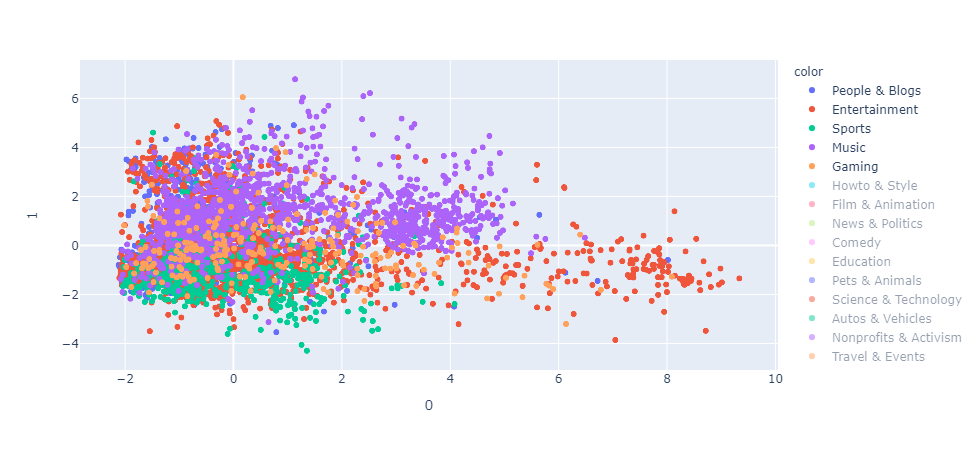

[0.18574894 0.12191259]


In [7]:
from sklearn import decomposition
import json 
import plotly.express as px

df = pd.read_csv(f"./../../our_data/Etap4/GB_US-rdy-to-learn-properly.csv")
df['category_id_GT'] = df['category_id_GT'].map(mapping)

list_of_vecs = df.loc[:, chosen_columns].values

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(list_of_vecs)

fig = px.scatter(pca_data, x=0, y=1, color=df['category_id_GT'])
fig.show()
print(pca.explained_variance_ratio_)

### Uczenie

#### Podzielenie zbioru <i>unlabeled</i> na uczący i testowy

In [27]:
# from sklearn.model_selection import train_test_split
# df_unlabeled = df.loc[df.category_id == -1, :]

# test_unlabeled_size = 0.3
# X_train_unlabeled, X_test_unlabeled, y_train_unlabeled, y_test_unlabeled = \
#                                     train_test_split(df_unlabeled.loc[:, chosen_columns], 
#                                                      df_unlabeled[['category_id', 'category_id_GT']], 
#                                                      test_size=test_unlabeled_size)

# print(f'X_train_unlabeled: ', X_train_unlabeled.shape)
# print(f'y_train_unlabeled: ', y_train_unlabeled.shape)
# print(f'X_test_unlabeled: ', X_test_unlabeled.shape)
# print(f'y_test_unlabeled: ', y_test_unlabeled.shape)

#### Wydzielenie zbioru uczącego ze zbioru <i>labeled</i>.

In [28]:
# X_train_labeled = df.loc[df.category_id != -1, chosen_columns]
# X_train_labeled[:3]

In [29]:
# y_train_labeled = df.loc[df.category_id != -1, ['category_id']].values.ravel()
# y_train_labeled[:5]

In [30]:
# print(f'X_train_labeled: ', X_train_labeled.shape)
# print(f'y_train_labeled: ', y_train_labeled.shape)

In [31]:
# X_train_mixed = np.concatenate((X_train_labeled, X_train_unlabeled))
# y_train_mixed = np.concatenate((y_train_labeled, y_train_unlabeled['category_id']))

In [32]:
# print(f'X_train_mixed: ', X_train_mixed.shape)
# print(f'y_train_mixed: ', y_train_mixed.shape)

In [15]:
def prepareSets(df, chosen_columns, verbose=False):
    X_labeled = df.loc[df.category_id != -1, chosen_columns]
    y_labeled = df.loc[df.category_id != -1, ['category_id_GT']].values.ravel()

    X_unlabeled = df.loc[df.category_id == -1, chosen_columns]
    y_unlabeled = df.loc[df.category_id == -1, ['category_id', 'category_id_GT']]


    X_mixed = np.concatenate((X_labeled, X_unlabeled))
    y_mixed = np.concatenate((y_labeled, y_unlabeled['category_id']))
    
    if verbose:
        print(f'X_labeled: ', X_labeled.shape)
        print(f'y_labeled: ', y_labeled.shape)
        print(f'X_unlabeled: ', X_unlabeled.shape)
        print(f'y_unlabeled: ', y_unlabeled.shape)
        print(f'X_mixed: ', X_mixed.shape)
        print(f'y_mixed: ', y_mixed.shape)
    
    return X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed

In [18]:
df = pd.read_csv("../../our_data/Etap4/GB_US-rdy-to-learn-properly-V2.csv")
chosen_columns = chosen_columns_r3[:20]
X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed = prepareSets(df, chosen_columns, verbose=True)

X_labeled:  (2811, 20)
y_labeled:  (2811,)
X_unlabeled:  (5698, 20)
y_unlabeled:  (5698, 2)
X_mixed:  (8509, 20)
y_mixed:  (8509,)


In [10]:
df = pd.read_csv("../../our_data/Etap4/GB_US-rdy-to-learn-properly-V2.csv")
# Counter(df.category_id).most_common()
unknown = df.loc[df.category_id==-1,:].shape[0]
known = df.loc[df.category_id!=-1,:].shape[0]
print(f"{round(known/(unknown+known)*100,2)}%")

33.04%


#### Baseline - LogisticRegression

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../../our_data/Etap4/GB_US-rdy-to-learn-properly-V2.csv")

k_best_columns = 20
sets_of_columns = {
    'r1': chosen_columns_r1[:k_best_columns], 
    'r2': chosen_columns_r2[:k_best_columns], 
    'r3': chosen_columns_r3[:k_best_columns],
    'all': chosen_columns_r1
}
for set_name, chosen_columns in sets_of_columns.items():
    X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed = prepareSets(df, chosen_columns, verbose=False)

    model = LogisticRegression(n_jobs=-1, max_iter=1000)
    model.fit(X_labeled, y_labeled)

    yhat = model.predict(X_unlabeled)
    score = accuracy_score(y_unlabeled['category_id_GT'], yhat)
    print(f'{set_name} accuracy: {score*100}%')

r1 accuracy: 51.01790101790101%
r2 accuracy: 38.53983853983854%
r3 accuracy: 51.50930150930151%
all accuracy: 52.63250263250263%


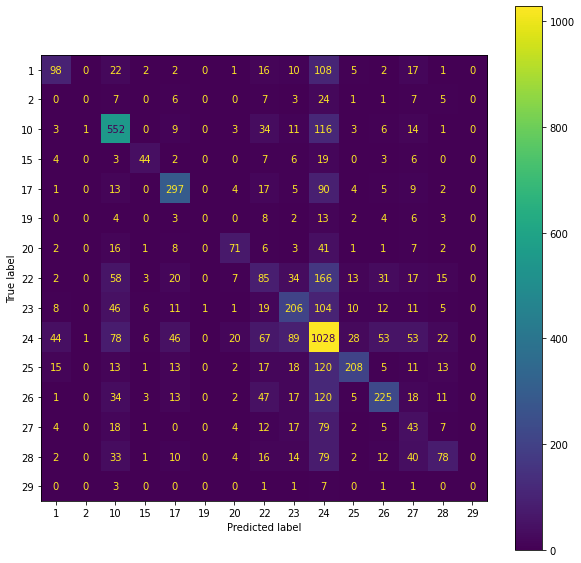

In [20]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))

X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed = prepareSets(df, sets_of_columns['r3'], verbose=False)

model = LogisticRegression(n_jobs=-1, max_iter=1000)
model.fit(X_labeled, y_labeled)
yhat = model.predict(X_unlabeled)
plot_confusion_matrix(model, X_unlabeled, y_unlabeled['category_id_GT'], ax=ax)  
plt.show()  

In [21]:
from sklearn.metrics import classification_report
res = classification_report(y_unlabeled['category_id_GT'], yhat, output_dict=True)
pd.DataFrame(res).transpose()

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision    recall  f1-score      support
1              0.532609  0.345070  0.418803   284.000000
2              0.000000  0.000000  0.000000    61.000000
10             0.613333  0.733068  0.667877   753.000000
15             0.647059  0.468085  0.543210    94.000000
17             0.675000  0.664430  0.669673   447.000000
19             0.000000  0.000000  0.000000    45.000000
20             0.596639  0.446541  0.510791   159.000000
22             0.236769  0.188470  0.209877   451.000000
23             0.472477  0.468182  0.470320   440.000000
24             0.486282  0.669707  0.563442  1535.000000
25             0.732394  0.477064  0.577778   436.000000
26             0.614754  0.453629  0.522042   496.000000
27             0.165385  0.223958  0.190265   192.000000
28             0.472727  0.268041  0.342105   291.000000
29             0.000000  0.000000  0.000000    14.000000
accuracy       0.515093  0.515093  0.515093     0.515093
macro avg      0.416362  0.360416  0.379079  5698.000000
weighted avg   0.513371  0.515093  0.503138  5698.000000

In [23]:
Counter(df.category_id.values).most_common()

[(-1, 5698),
 (24, 678),
 (10, 603),
 (22, 240),
 (23, 216),
 (26, 214),
 (17, 181),
 (1, 165),
 (25, 150),
 (28, 100),
 (20, 96),
 (27, 77),
 (15, 49),
 (19, 19),
 (2, 16),
 (29, 5),
 (43, 2)]

### LabelPropagation and LabelSpreaing - Testing

In [20]:
import itertools as it
import warnings
warnings.filterwarnings("ignore")
import json

from sklearn.model_selection import GridSearchCV
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score

df = pd.read_csv("../../our_data/Etap4/GB_US-rdy-to-learn-properly-V2.csv")
k_best_columns = 20

sets_of_columns = {
    'r1': chosen_columns_r1[:k_best_columns], 
    'r2': chosen_columns_r2[:k_best_columns], 
    'r3': chosen_columns_r3[:k_best_columns],
    'all': chosen_columns_r1
}

results = {}

kernel = [{'kernel': 'knn'}, {'kernel': 'rbf'}] 
n_neighbors = [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}]
gamma = [{'gamma': 1.0},  {'gamma': 10.0}]
alpha = [{'alpha': 0.1}, {'alpha': 0.2}, {'alpha': 0.4}]

LP_params_temp = list(it.product(kernel, n_neighbors, gamma))
LS_params_temp = list(it.product(kernel, n_neighbors, gamma, alpha))


LP_params = []
for params in LP_params_temp:
    temp_dict = {}
    for param in params:
        temp_dict[list(param.keys())[0]] = list(param.values())[0]
    LP_params.append(temp_dict)
     
LS_params = []
for params in LS_params_temp:
    temp_dict = {}
    for param in params:
        temp_dict[list(param.keys())[0]] = list(param.values())[0]
    LS_params.append(temp_dict)
    

sets_results_LP = {}
sets_results_LS = {}
for set_name, chosen_columns in sets_of_columns.items():
    X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed = prepareSets(df, chosen_columns, verbose=False)
    
    for params in LP_params:
        modelLP = LabelPropagation(n_jobs=-1, 
                                   kernel=params['kernel'], 
                                   gamma=params['gamma'], 
                                   n_neighbors=params['n_neighbors'])
        
        modelLP.fit(X_mixed, y_mixed)
        yhat = modelLP.predict(X_unlabeled)

        score = accuracy_score(y_unlabeled['category_id_GT'], yhat)
 
        print('Accuracy: %.3f' % (score*100))
        print(params)
        
        if set_name in sets_results_LP:
            sets_results_LP[set_name].append((score, params))
        else:
            sets_results_LP[set_name] = []
            sets_results_LP[set_name].append((score, params))
            
    for params in LS_params:
        modelLS = LabelSpreading(n_jobs=-1, 
                                 kernel=params['kernel'], 
                                 gamma=params['gamma'], 
                                 n_neighbors=params['n_neighbors'],
                                 alpha=params['alpha'])
        
        modelLS.fit(X_mixed, y_mixed)
        yhat = modelLS.predict(X_unlabeled)

        score = accuracy_score(y_unlabeled['category_id_GT'], yhat)
 
        print('Accuracy: %.3f' % (score*100))
        print(params)
        
        if set_name in sets_results_LS:
            sets_results_LS[set_name].append((score, params))
        else:
            sets_results_LS[set_name] = []
            sets_results_LS[set_name].append((score, params))
        
# with open(f'../../our_data/Etap4/results/LabelPropagation.json', 'w') as file:
#     file.write(json.dumps(sets_results_LP))
    
# with open(f'../../our_data/Etap4/results/LabelSpreading.json', 'w') as file:
#     file.write(json.dumps(sets_results_LS))

Accuracy: 40.909
{'kernel': 'knn', 'n_neighbors': 3, 'gamma': 1.0, 'alpha': 0.1}
Accuracy: 40.997
{'kernel': 'knn', 'n_neighbors': 3, 'gamma': 1.0, 'alpha': 0.2}
Accuracy: 41.085
{'kernel': 'knn', 'n_neighbors': 3, 'gamma': 1.0, 'alpha': 0.4}
Accuracy: 40.909
{'kernel': 'knn', 'n_neighbors': 3, 'gamma': 10.0, 'alpha': 0.1}
Accuracy: 40.997
{'kernel': 'knn', 'n_neighbors': 3, 'gamma': 10.0, 'alpha': 0.2}
Accuracy: 41.085
{'kernel': 'knn', 'n_neighbors': 3, 'gamma': 10.0, 'alpha': 0.4}
Accuracy: 47.789
{'kernel': 'knn', 'n_neighbors': 5, 'gamma': 1.0, 'alpha': 0.1}
Accuracy: 47.964
{'kernel': 'knn', 'n_neighbors': 5, 'gamma': 1.0, 'alpha': 0.2}
Accuracy: 48.069
{'kernel': 'knn', 'n_neighbors': 5, 'gamma': 1.0, 'alpha': 0.4}
Accuracy: 47.789
{'kernel': 'knn', 'n_neighbors': 5, 'gamma': 10.0, 'alpha': 0.1}
Accuracy: 47.964
{'kernel': 'knn', 'n_neighbors': 5, 'gamma': 10.0, 'alpha': 0.2}
Accuracy: 48.069
{'kernel': 'knn', 'n_neighbors': 5, 'gamma': 10.0, 'alpha': 0.4}
Accuracy: 48.929
{'ker

In [65]:
def checkIfExists(all_params, check_param):

    for acc, p in all_params:
        if p.keys() == check_param[1].keys():
            same = True
            for key in p.keys():
                if p[key] != check_param[1][key]:
                    same = False
            if same:
                return True
    return False

def clean(sets_results):
    result = {}
    
    for set_name in sets_results.keys():
        one_set = sets_results[set_name]
        proper_params_list = []
        for res in one_set:
            temp = res[1].copy()
            if res[1]['kernel'] == 'knn':
                temp.pop('gamma', None)
            elif res[1]['kernel'] == 'rbf':
                temp.pop('n_neighbors', None)

            proper_params_list.append((res[0], temp))

            without_duplication = []
            for el in proper_params_list:
                if not checkIfExists(without_duplication, el):
                    without_duplication.append(el)
        
        result[set_name] =  without_duplication
        
    return result

sets_results_LS_clean = clean(sets_results_LS)
sets_results_LP_clean = clean(sets_results_LP)

# with open(f'../../our_data/Etap4/results/LabelPropagation_clean.json', 'w') as file:
#     file.write(json.dumps(sets_results_LP_clean))
    
# with open(f'../../our_data/Etap4/results/LabelSpreading_clean.json', 'w') as file:
#     file.write(json.dumps(sets_results_LS_clean))

#### LabelPropagation

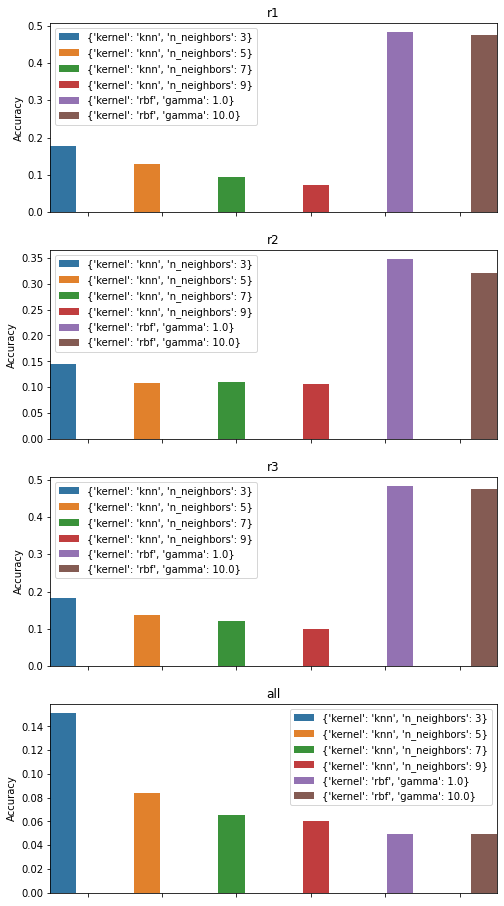

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
with open(f'../../our_data/Etap4/results/LabelPropagation_clean.json', 'r') as file:
    sets_results_LP_clean = json.loads(file.read())

fig, ax = plt.subplots(4, 1)
fig.set_size_inches(8, 16)

for i, set_name in enumerate(sets_results_LP_clean.keys()):
    data = np.array(sets_results_LP_clean[set_name])
    params_str_list = [str(x) for x in data[:,1]]
    
    f = sns.barplot(x=params_str_list, y=data[:,0], hue=params_str_list, ax=ax[i])
    change_width(ax[i], .35)
    
    f.set(xticklabels=[])
    f.set(ylabel='Accuracy')
    f.set(title=set_name)
    
plt.savefig(f'../../our_data/Etap4/charts/LabelPropagation.png')
plt.show()

#### LabelSpreading

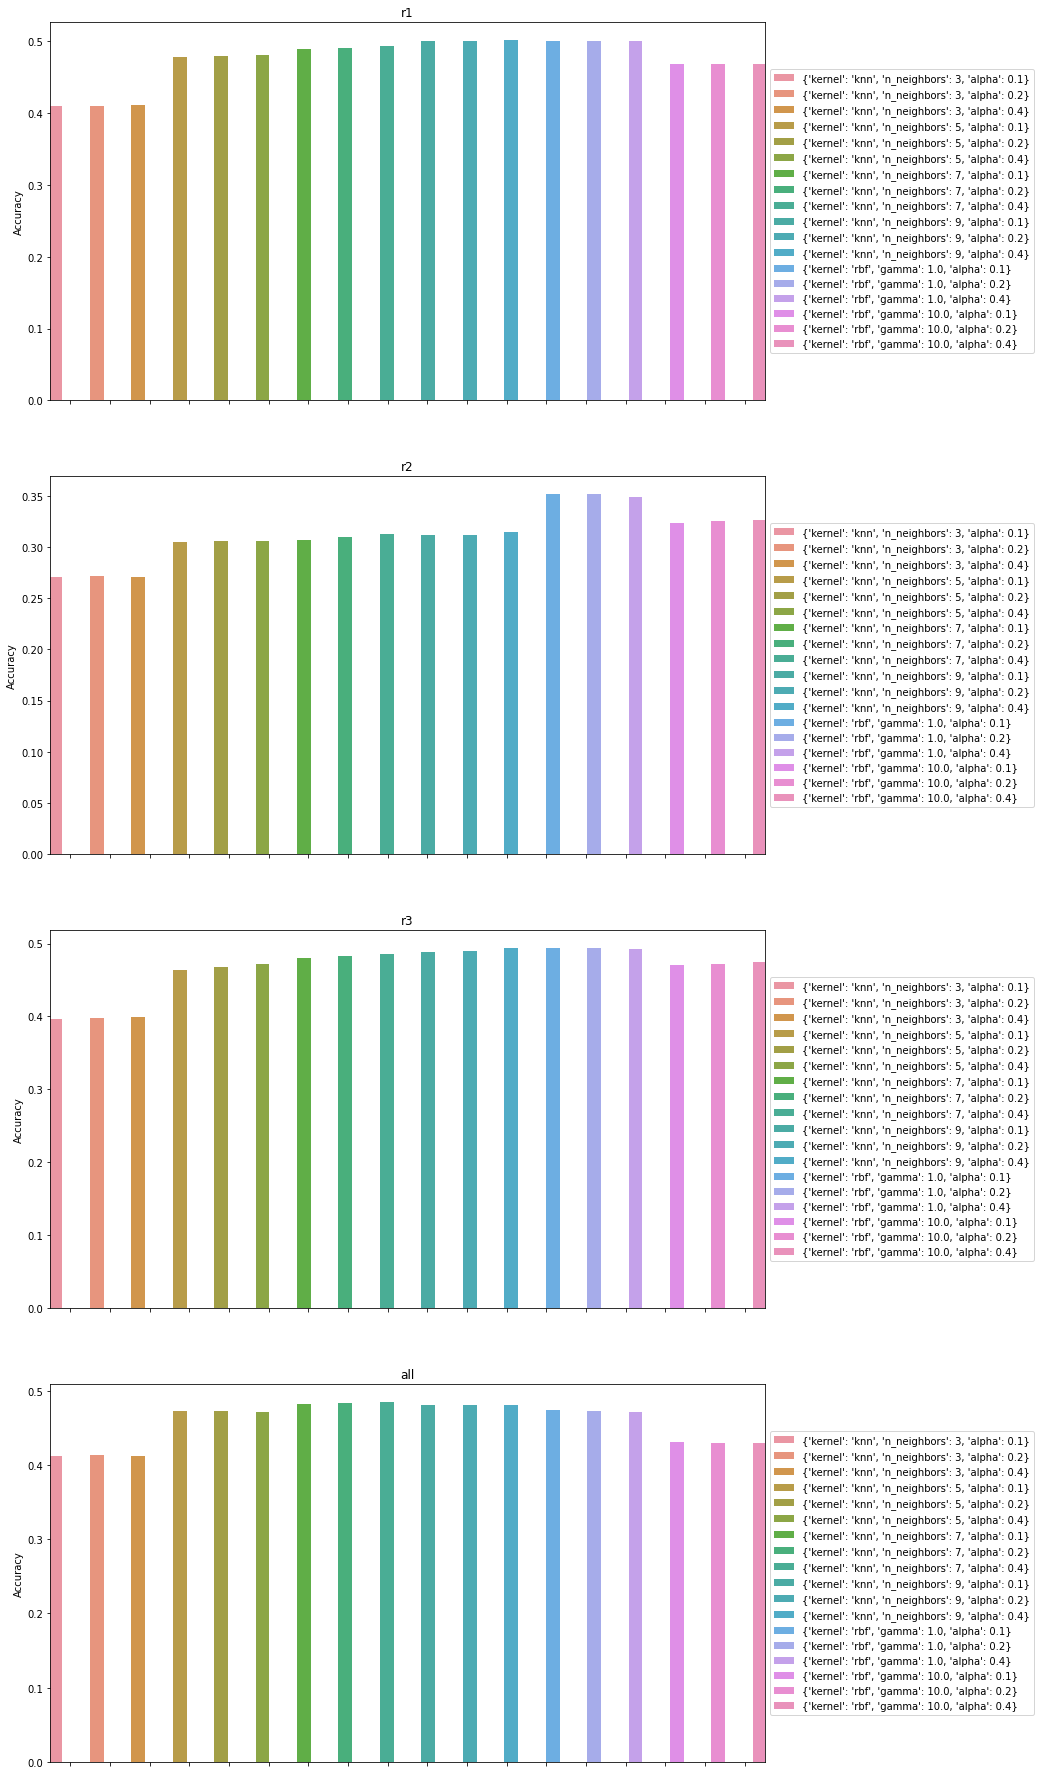

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# sets_results_LP_clean = None
with open(f'../../our_data/Etap4/results/LabelSpreading_clean.json', 'r') as file:
    sets_results_LS_clean = json.loads(file.read())
    
fig, ax = plt.subplots(4, 1)
fig.set_size_inches(16, 32)

for i, set_name in enumerate(sets_results_LS_clean.keys()):
    data = np.array(sets_results_LS_clean[set_name])
    params_str_list = [str(x) for x in data[:,1]]
    
    f = sns.barplot(x=params_str_list, y=data[:,0], hue=params_str_list, ax=ax[i])
    
    box = ax[i].get_position()
    ax[i].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    change_width(ax[i], .35)
    
    f.set(xticklabels=[])
    f.set(ylabel='Accuracy')
    f.set(title=set_name)
plt.savefig(f'../../our_data/Etap4/charts/LabelSpreading.png')
plt.show()

#### LabelPropagation Best

In [36]:
k_best_columns = 20

sets_of_columns = {
    'r1': chosen_columns_r1[:k_best_columns], 
    'r2': chosen_columns_r2[:k_best_columns], 
    'r3': chosen_columns_r3[:k_best_columns],
    'all': chosen_columns_r1
}

df = pd.read_csv("../../our_data/Etap4/GB_US-rdy-to-learn-properly-V2.csv")

X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed = prepareSets(df, sets_of_columns['r3'], verbose=True)

modelLP = LabelPropagation(n_jobs=-1, kernel='rbf', gamma=1.0)
modelLP.fit(X_mixed, y_mixed)
yhat = modelLP.predict(X_unlabeled)

score = accuracy_score(y_unlabeled['category_id_GT'], yhat)
print(f'r1 accuracy: %{score*100}')

X_labeled:  (2811, 20)
y_labeled:  (2811,)
X_unlabeled:  (5698, 20)
y_unlabeled:  (5698, 2)
X_mixed:  (8509, 20)
y_mixed:  (8509,)


/home/lilatee/.local/lib/python3.8/site-packages/sklearn/semi_supervised/_label_propagation.py:290: ConvergenceWarning:

max_iter=1000 was reached without convergence.



r1 accuracy: %48.42049842049842


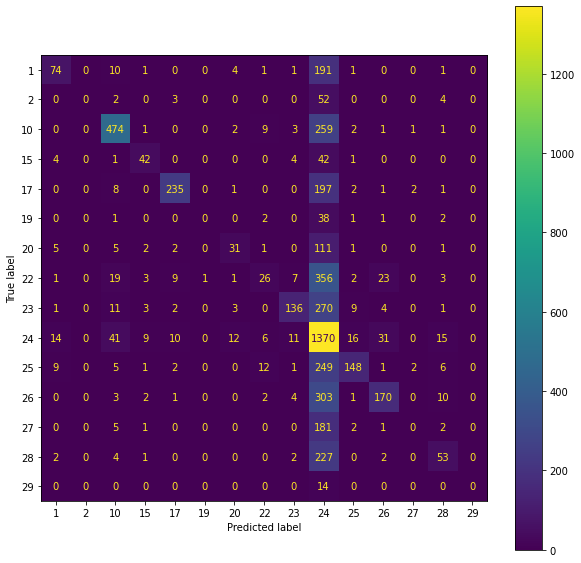

In [37]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(modelLP, X_unlabeled, y_unlabeled['category_id_GT'],ax=ax)  
plt.show()  

In [38]:
from sklearn.metrics import classification_report
res = classification_report(y_unlabeled['category_id_GT'], yhat, output_dict=True)
pd.DataFrame(res).transpose()

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/lilatee/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision    recall  f1-score      support
1              0.672727  0.260563  0.375635   284.000000
2              0.000000  0.000000  0.000000    61.000000
10             0.804754  0.629482  0.706408   753.000000
15             0.636364  0.446809  0.525000    94.000000
17             0.890152  0.525727  0.661041   447.000000
19             0.000000  0.000000  0.000000    45.000000
20             0.574074  0.194969  0.291080   159.000000
22             0.440678  0.057650  0.101961   451.000000
23             0.804734  0.309091  0.446634   440.000000
24             0.354922  0.892508  0.507878  1535.000000
25             0.795699  0.339450  0.475884   436.000000
26             0.723404  0.342742  0.465116   496.000000
27             0.000000  0.000000  0.000000   192.000000
28             0.530000  0.182131  0.271100   291.000000
29             0.000000  0.000000  0.000000    14.000000
accuracy       0.484205  0.484205  0.484205     0.484205
macro avg      0.481834  0.278741  0.321849  5698.000000
weighted avg   0.579787  0.484205  0.450841  5698.000000

#### LabelSpreading Best

In [39]:
k_best_columns = 20

sets_of_columns = {
    'r1': chosen_columns_r1[:k_best_columns], 
    'r2': chosen_columns_r2[:k_best_columns], 
    'r3': chosen_columns_r3[:k_best_columns],
    'all': chosen_columns_r1
}

df = pd.read_csv("../../our_data/Etap4/GB_US-rdy-to-learn-properly-V2.csv")

X_labeled, y_labeled, X_unlabeled, y_unlabeled, X_mixed, y_mixed = prepareSets(df, sets_of_columns['r3'], verbose=True)

modelLS = LabelSpreading(n_jobs=-1, kernel='knn', n_neighbors=9, alpha=0.4)
modelLS.fit(X_mixed, y_mixed)
yhat = modelLS.predict(X_unlabeled)

score = accuracy_score(y_unlabeled['category_id_GT'], yhat)
print(f'r1 accuracy: %{score*100}')

X_labeled:  (2811, 20)
y_labeled:  (2811,)
X_unlabeled:  (5698, 20)
y_unlabeled:  (5698, 2)
X_mixed:  (8509, 20)
y_mixed:  (8509,)
r1 accuracy: %49.40329940329941


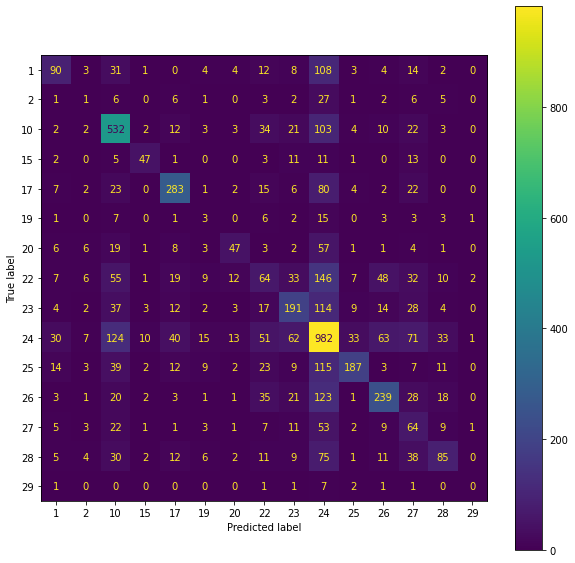

In [40]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(modelLS, X_unlabeled, y_unlabeled['category_id_GT'],ax=ax)  
plt.show()  

In [41]:
from sklearn.metrics import classification_report
res = classification_report(y_unlabeled['category_id_GT'], yhat, output_dict=True)
pd.DataFrame(res).transpose()

precision    recall  f1-score      support
1              0.505618  0.316901  0.389610   284.000000
2              0.025000  0.016393  0.019802    61.000000
10             0.560000  0.706507  0.624780   753.000000
15             0.652778  0.500000  0.566265    94.000000
17             0.690244  0.633110  0.660443   447.000000
19             0.050000  0.066667  0.057143    45.000000
20             0.522222  0.295597  0.377510   159.000000
22             0.224561  0.141907  0.173913   451.000000
23             0.491003  0.434091  0.460796   440.000000
24             0.487103  0.639739  0.553084  1535.000000
25             0.730469  0.428899  0.540462   436.000000
26             0.582927  0.481855  0.527594   496.000000
27             0.181303  0.333333  0.234862   192.000000
28             0.461957  0.292096  0.357895   291.000000
29             0.000000  0.000000  0.000000    14.000000
accuracy       0.494033  0.494033  0.494033     0.494033
macro avg      0.411012  0.352473  0.369611  5698.000000
weighted avg   0.502608  0.494033  0.486152  5698.000000